In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset00.csv


In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/kaggle/input/diabetes-dataset/diabetes_dataset00.csv'  # Update this path to the location of your dataset
df = pd.read_csv(file_path)

print(df.head())


                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...     

In [4]:
print(df.columns)

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [6]:
print( df.describe())

       Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max         49.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          70000.000000   
mean           194.867200            35.051657            160.701657   
std             44.532466             6.803461             48.165547   
min            100.000000            20.000000             80.000000   
25%            163

In [7]:

print(df.isnull().sum())

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


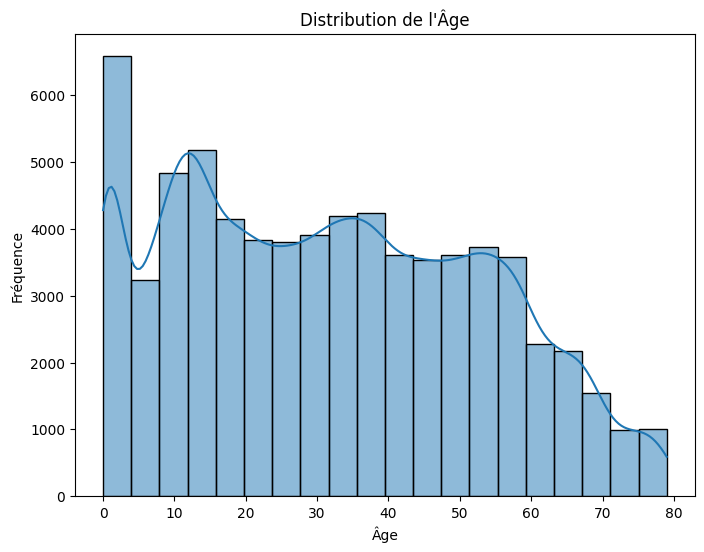

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


Analyse du graphique :
Plage d'âge :

L'âge dans le jeu de données va de 0 à environ 80 ans. Il est divisé en 20 bins, chaque bin représentant un intervalle d'âge d'environ 4 ans.
Distribution globale :

On observe des pics marqués à certains âges, par exemple :
Autour de 0-5 ans : Cela indique qu'une grande proportion des individus dans le jeu de données sont très jeunes.
Vers 10-20 ans : Un autre groupe important semble être dans cette tranche d'âge.
Une distribution plus uniforme dans les âges de 30 à 50 ans.
Densité décroissante après 50 ans :

La densité de la population dans les tranches d'âge au-delà de 50 ans diminue progressivement, ce qui signifie qu'il y a moins d'individus plus âgés dans le jeu de données. Cela pourrait refléter soit une population plus jeune dans l'ensemble, soit un biais de collecte de données, si cette base de données concerne spécifiquement des groupes d'âges plus jeunes.
Pic chez les très jeunes enfants (0-5 ans) :

Courbe de densité (KDE) :

La courbe de densité suit de près les barres de l'histogramme, montre la présence de multiples pics dans la distribution. La courbe permet de visualiser de manière plus fluide les pics, comme celui autour des 0-5 ans et des 10-20 ans.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


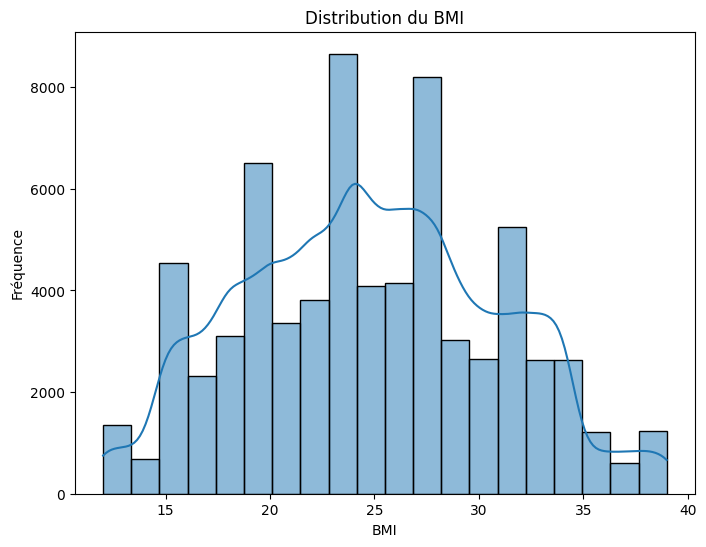

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution du BMI')
plt.xlabel('BMI')
plt.ylabel('Fréquence')
plt.show()

Analyse du graphique de la distribution du BMI :
Plage du BMI : La majorité des individus ont un BMI compris entre 20 et 35.
Pic principal autour de 25 : Le pic le plus élevé de la distribution se situe autour de 25, ce qui correspond à la limite supérieure de la catégorie de poids normal.
Asymétrie de la distribution : La distribution montre un léger biais vers la droite, avec un nombre décroissant d'individus ayant un BMI supérieur à 30 (catégorie obésité).
Sous-représentation des valeurs extrêmes : Il y a relativement peu de personnes avec un BMI très bas (sous-poids) ou très élevé (obésité sévère).
Conclusion :
La population étudiée semble être majoritairement dans une catégorie de poids normal à légèrement en surpoids, avec moins de personnes sous-poids ou en obésité sévère.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


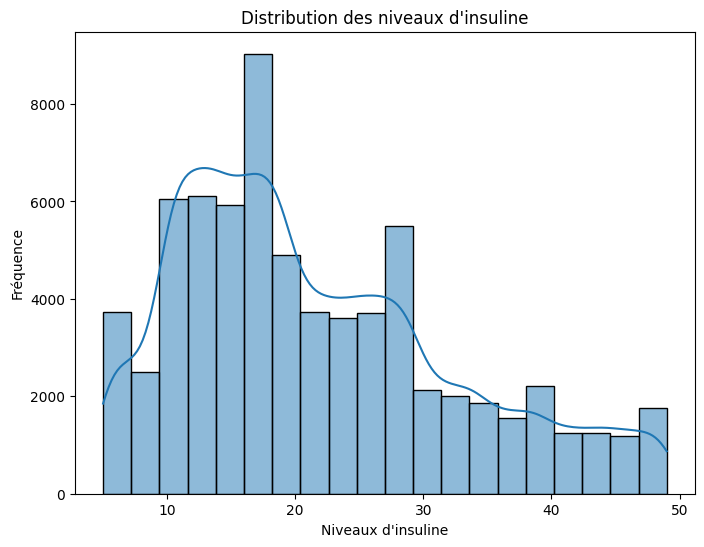

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin Levels'], bins=20, kde=True)
plt.title('Distribution des niveaux d\'insuline')
plt.xlabel('Niveaux d\'insuline')
plt.ylabel('Fréquence')
plt.show()

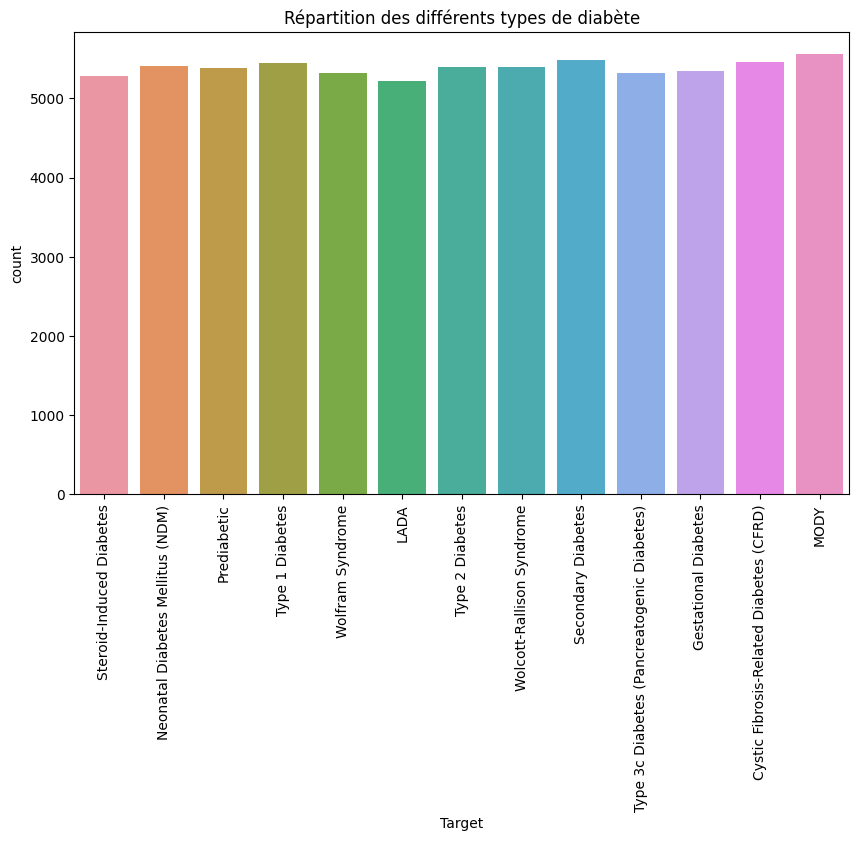

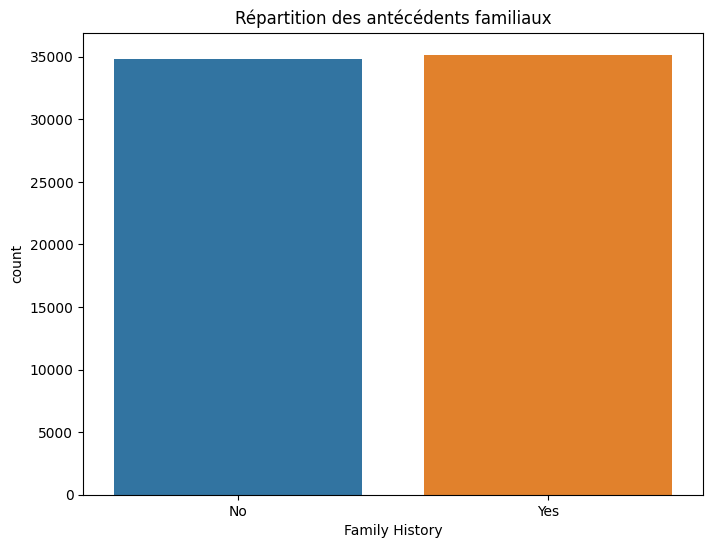

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.xticks(rotation=90)
plt.title('Répartition des différents types de diabète')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Family History', data=df)
plt.title('Répartition des antécédents familiaux')
plt.show()

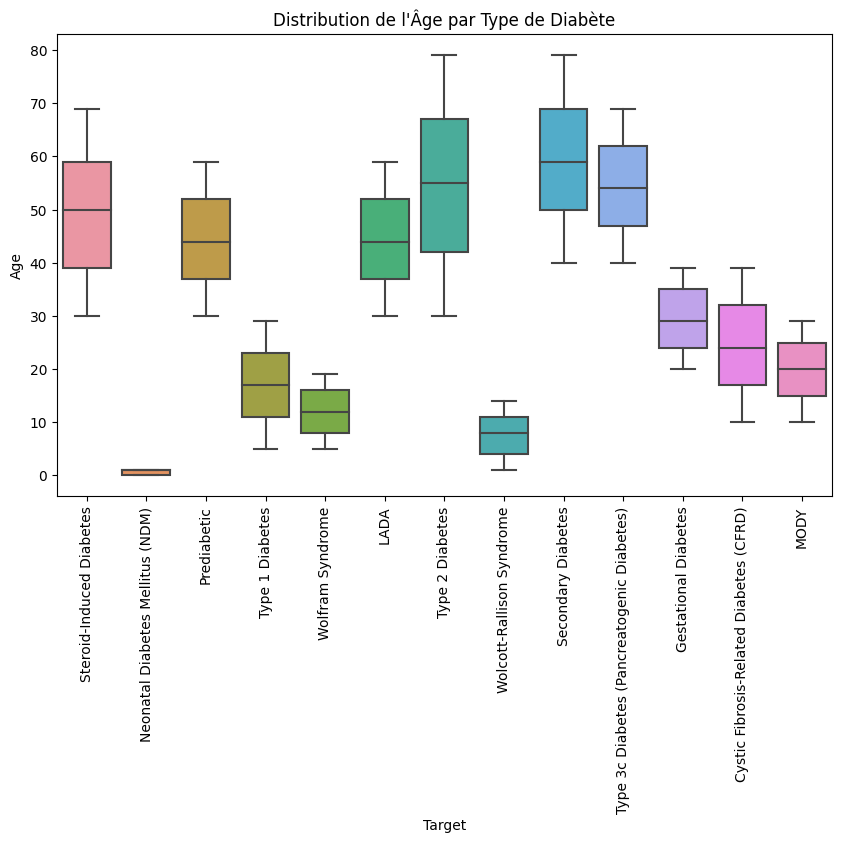

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Distribution de l\'Âge par Type de Diabète')
plt.show()

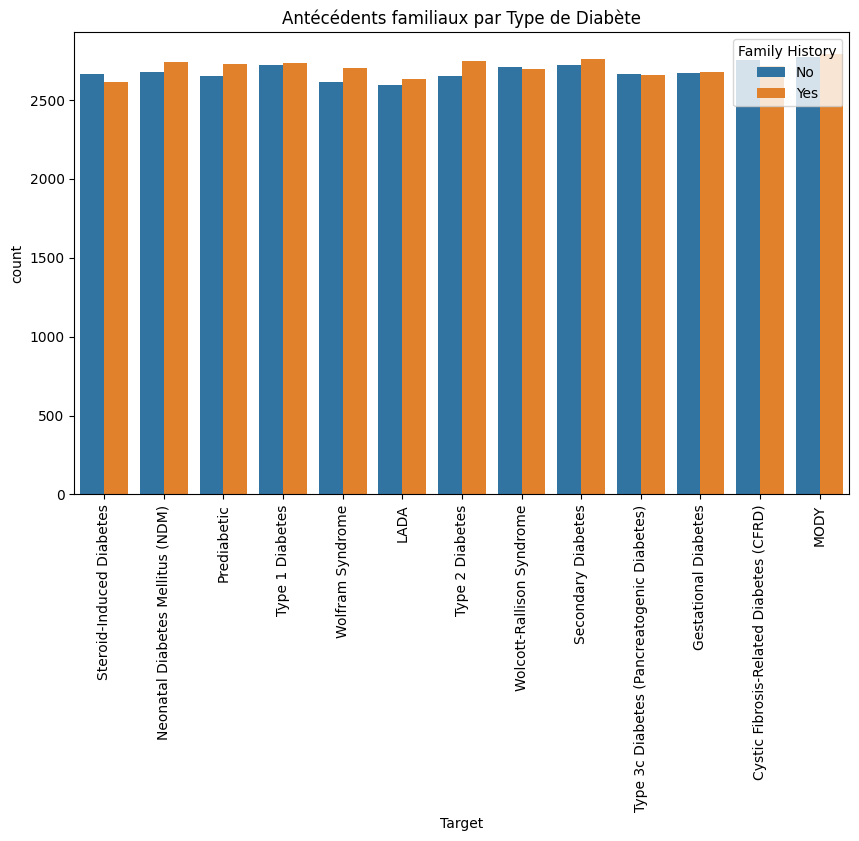

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', hue='Family History', data=df)
plt.xticks(rotation=90)
plt.title('Antécédents familiaux par Type de Diabète')
plt.show()

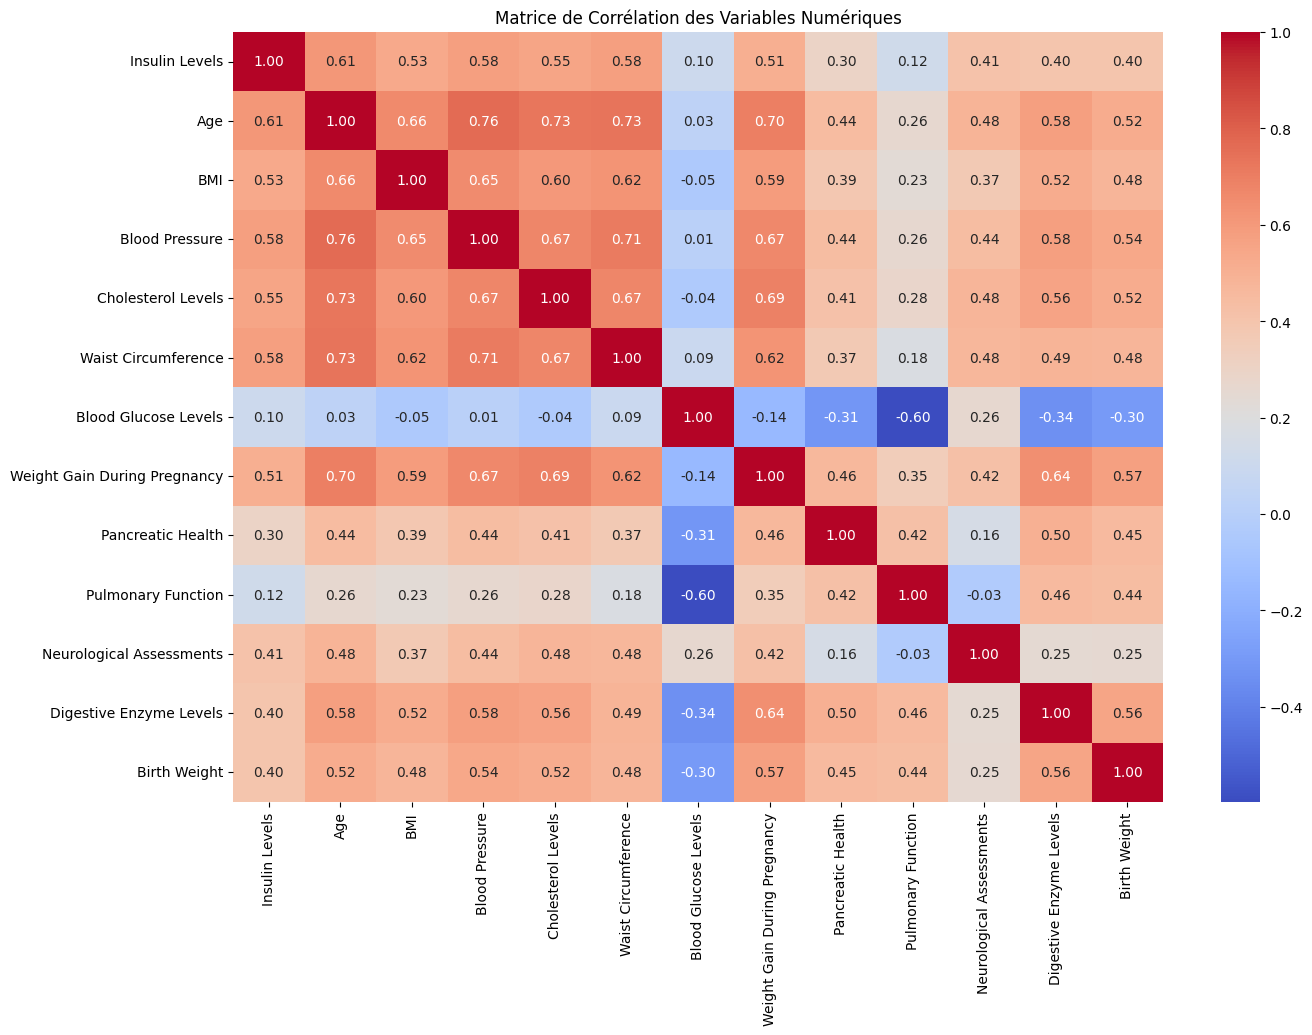

In [14]:

df_numeric = df.select_dtypes(include='number')


corr_matrix = df_numeric.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

L'âge montre plusieurs corrélations fortes avec d'autres variables dans cette matrice. Cela reflète bien le fait que l'âge est un facteur clé dans de nombreux aspects de la santé. Voici un résumé des corrélations fortes impliquant l'âge :

1. Age et Blood Pressure (0.76) :
Corrélation très forte. Cela signifie que plus les personnes vieillissent, plus elles ont tendance à avoir une pression artérielle élevée. Ce phénomène est bien documenté et lié au durcissement des artères et à d'autres changements physiologiques qui accompagnent le vieillissement.
2. Age et Waist Circumference (0.73) :
Forte corrélation également. Cela indique qu'en vieillissant, les personnes tendent à accumuler plus de graisse abdominale, ce qui est associé à divers risques de maladies métaboliques comme le diabète de type 2.
3. Age et Cholesterol Levels (0.73) :
Ici aussi, on observe une forte corrélation entre l'âge et les niveaux de cholestérol. Cela reflète la tendance des niveaux de cholestérol à augmenter avec l'âge, en raison de facteurs comme le métabolisme lipidique qui devient moins efficace au fil du temps.
4. Age et BMI (0.66) :
Une corrélation forte, mais un peu moins marquée. Cela signifie que le vieillissement est souvent associé à une augmentation de l'indice de masse corporelle (IMC), bien que d'autres facteurs comme l'alimentation et l'activité physique puissent également jouer un rôle.
5. Age et Insulin Levels (0.61) :
Corrélation modérée à forte. Avec l'âge, les niveaux d'insuline tendent à augmenter, potentiellement en réponse à une augmentation de la résistance à l'insuline, ce qui est souvent observé chez les personnes âgées.
Analyse générale :
L'âge semble être un facteur clé qui influence plusieurs aspects de la santé métabolique. La forte corrélation avec des variables telles que la pression artérielle, le tour de taille, l'IMC et le cholestérol indique que de nombreux indicateurs de risque cardiovasculaire et métabolique s'aggravent avec l'âge.

Ces observations soulignent l'importance de surveiller ces indicateurs avec l'avancement de l'âge pour prévenir des maladies chroniques telles que l'hypertension, le diabète, et les maladies cardiovasculaires.

Cette concentration de corrélations fortes autour de l'âge confirme que le vieillissement est un facteur influent dans l'état de santé global, surtout pour les maladies chroniques liées au métabolisme et au système cardiovasculaire.

**Variables avec une faible corrélation ou sans corrélation :**
Insulin Levels et Blood Glucose Levels (0.10) : Il est intéressant de noter que la corrélation entre les niveaux d'insuline et les niveaux de glucose sanguin est assez faible, ce qui pourrait indiquer une variabilité importante dans la réponse à l'insuline.
Pancreatic Health et Blood Glucose Levels (-0.31) : Il existe une corrélation négative modérée entre la santé pancréatique et les niveaux de glucose sanguin. Une mauvaise santé du pancréas semble être associée à des niveaux de glucose sanguin plus élevés.
Pulmonary Function et Blood Glucose Levels (-0.60) : Corrélation négative significative qui suggère que les personnes ayant une mauvaise fonction pulmonaire pourraient avoir des niveaux de glucose sanguin plus élevés.
**** Variables avec une forte corrélation négative :********
Pulmonary Function et Blood Glucose Levels (-0.60) : Une forte corrélation négative, ce qui signifie que les personnes ayant une meilleure fonction pulmonaire ont des niveaux de glucose sanguin plus faibles.
Pulmonary Function et Pancreatic Health (-0.60) : Une forte corrélation négative, ce qui suggère que la santé pulmonaire et la santé pancréatique sont inversement liées.



In [15]:

for col in df.select_dtypes(include=['object']).columns:
    print(f"Valeurs uniques pour la colonne {col} :")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Valeurs uniques pour la colonne Target :
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques pour la colonne Genetic Markers :
Genetic Markers
Positive    35101
Negative    34899
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques pour la colon

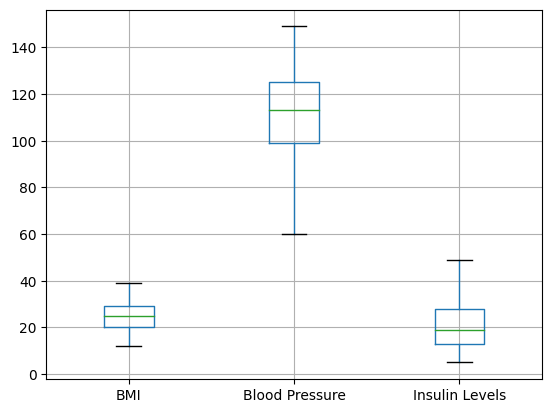

In [16]:
df[['BMI', 'Blood Pressure', 'Insulin Levels']].boxplot()
plt.show()



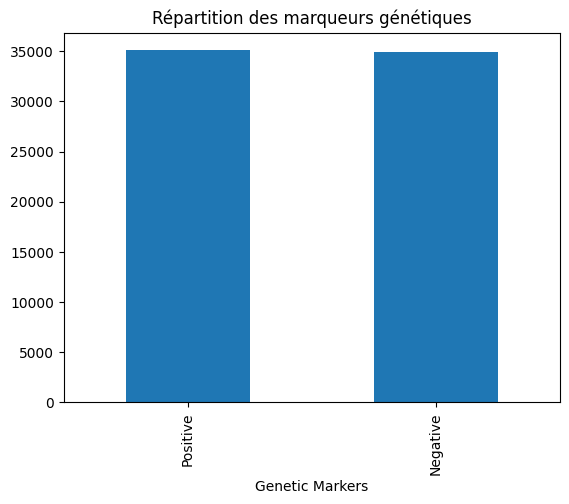

In [17]:
df['Genetic Markers'].value_counts().plot(kind='bar')
plt.title('Répartition des marqueurs génétiques')
plt.show()


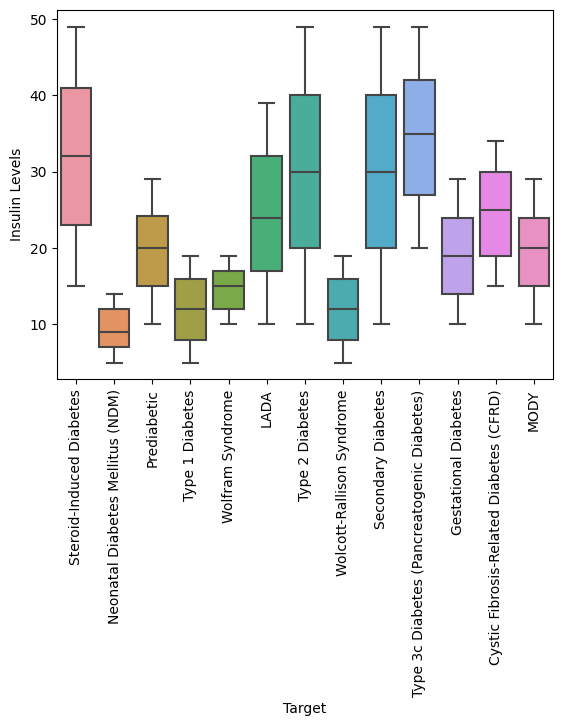

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Target', y='Insulin Levels', data=df)
plt.xticks(rotation=90)
plt.show()


Ce boxplot montre la distribution des niveaux d'insuline (axe des y) en fonction des différents types de diabète (variables cibles Target, axe des x). Chaque boîte représente la dispersion des niveaux d'insuline pour un type de diabète spécifique, avec la médiane, le premier et le troisième quartile, ainsi que les valeurs extrêmes (whiskers).

Analyse des différents types de diabète et niveaux d’insuline :
Steroid-Induced Diabetes :

Les niveaux d'insuline sont relativement élevés, avec une médiane proche de 30, et des valeurs qui s’étendent d’environ 25 à plus de 40. Cela suggère que ce type de diabète est associé à une hyperinsulinémie marquée.
Neonatal Diabetes Mellitus (NDM) :

Niveaux d'insuline modérément bas, avec une médiane autour de 15, et une dispersion plus faible par rapport aux autres types de diabète.
Prediabetic :

Niveaux d'insuline très faibles, avec une médiane proche de 10. Cela est cohérent avec la physiopathologie des prédiabétiques, où l'insuline peut être faible avant la progression vers un diabète complet.
Type 1 Diabetes :

Médiane des niveaux d'insuline encore plus faible, autour de 5 à 10. Le diabète de type 1 est caractérisé par une destruction des cellules productrices d'insuline, ce qui explique les faibles niveaux observés.
Wolfram Syndrome :

Des niveaux d'insuline similaires à ceux du diabète de type 1, avec une médiane basse. Ce syndrome étant souvent associé à un diabète insulinoprive, cela est attendu.
LADA (Latent Autoimmune Diabetes in Adults) :

Niveaux légèrement plus élevés que dans le diabète de type 1, avec une médiane autour de 10 à 15. Cette forme de diabète auto-immune évolue souvent plus lentement que le diabète de type 1.
Type 2 Diabetes :

Forte variation des niveaux d'insuline, avec une médiane autour de 30. Les niveaux élevés d'insuline sont caractéristiques du diabète de type 2 dans les phases de résistance à l'insuline.
Wolcott-Rallison Syndrome :

Niveaux relativement bas (médiane autour de 10), ce qui pourrait indiquer des perturbations dans la production d'insuline dans ce syndrome génétique rare.
Secondary Diabetes :

Médiane et distribution modérées, avec des niveaux d'insuline entre 15 et 30, ce qui suggère que la production d'insuline peut être compromise dans certains cas de diabète secondaire.
Type 3c Diabetes (Pancreatogenic Diabetes) :

Médiane basse (autour de 10), ce qui est cohérent avec une atteinte pancréatique, souvent associée à une réduction significative de la production d'insuline.
Gestational Diabetes :

Niveaux modérément élevés avec une médiane autour de 20, ce qui est cohérent avec les besoins accrus en insuline pendant la grossesse chez certaines femmes.
Cystic Fibrosis-Related Diabetes (CFRD) :

Médiane basse, autour de 15, avec une variation modérée. Ce type de diabète est généralement associé à une diminution de la production d'insuline due à une atteinte pancréatique.
MODY (Maturity Onset Diabetes of the Young) :

Médiane autour de 15, avec une dispersion modérée. Le MODY est caractérisé par des anomalies génétiques affectant la fonction des cellules productrices d'insuline, ce qui explique des niveaux d'insuline variables.
Points d’analyse :
Variation des niveaux d'insuline : On observe une grande variation des niveaux d'insuline entre les différents types de diabète. Le diabète de type 2, le diabète induit par les stéroïdes, et le diabète gestationnel montrent des niveaux d'insuline plus élevés, ce qui est typique des situations de résistance à l'insuline.
Faibles niveaux d'insuline : Les types de diabète associés à une déficience insulinique (par exemple, diabète de type 1, syndrome de Wolfram) présentent des niveaux d'insuline plus faibles.
Dispersion des données : Certains types de diabète (par exemple, diabète de type 2 et diabète gestationnel) montrent une grande dispersion des niveaux d'insuline, reflétant probablement une hétérogénéité plus importante dans ces conditions.
Conclusion :
Ce boxplot illustre les différentes caractéristiques des niveaux d'insuline selon les types de diabète. Il révèle clairement la diversité des profils insulinémiques, avec des formes de diabète comme le type 1 qui sont associés à une insulinopénie sévère, tandis que des types comme le diabète de type 2 ou le diabète gestationnel montrent des niveaux d'insuline plus élevés, souvent dus à la résistance à l'insuline.

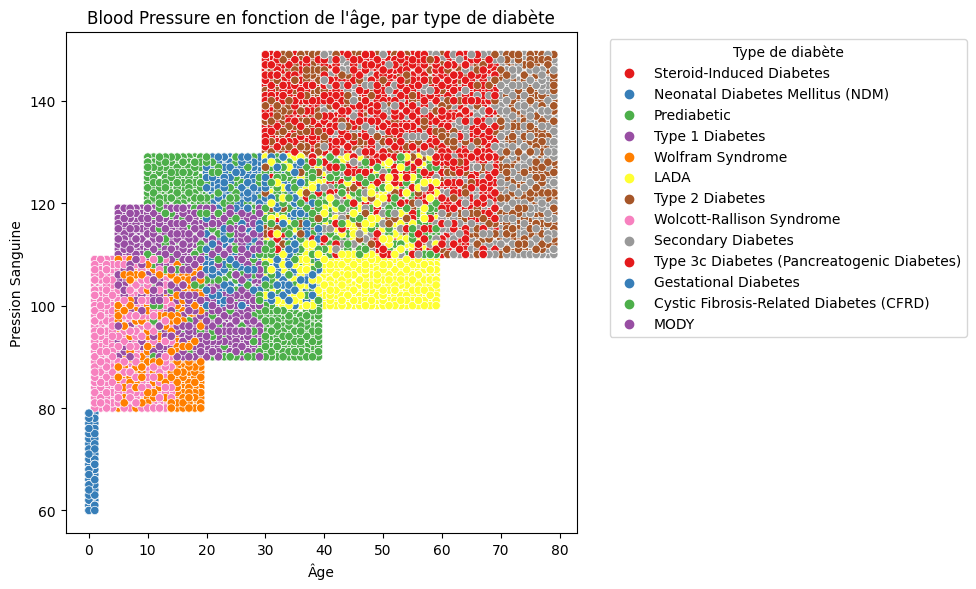

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood Pressure', hue='Target', data=df, palette='Set1')

plt.title('Blood Pressure en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Pression Sanguine')

plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour s'assurer que tout est bien ajusté
plt.show()


Le graphique montre la pression sanguine en fonction de l'âge, avec une distinction par les types de diabète (variable "Target"). Voici quelques conclusions que l'on peut tirer de cette visualisation :

1. Tendance générale avec l'âge :
On observe que la pression sanguine augmente avec l'âge. Les individus plus jeunes (0 à 20 ans) ont majoritairement une pression sanguine plus faible (autour de 80-100), tandis que les individus plus âgés (40 à 80 ans) tendent à avoir une pression sanguine plus élevée (100-140).
Cela correspond à des connaissances médicales bien établies : la pression sanguine a tendance à augmenter avec l'âge en raison de facteurs tels que l'élasticité réduite des vaisseaux sanguins et les changements métaboliques.
2. Différences entre types de diabète :
Les couleurs représentent les différentes catégories de diabète, et on peut observer des distributions distinctes en fonction du type de diabète.
Type 1 Diabetes (vert) : Majoritairement observé chez des individus plus jeunes, ce qui est cohérent car le diabète de type 1 se déclare souvent pendant l'enfance ou l'adolescence.
Type 2 Diabetes (marron) : Se retrouve principalement chez des individus plus âgés (au-delà de 40 ans), ce qui correspond à la prévalence du diabète de type 2, souvent lié à des facteurs comme l'âge, le surpoids et la résistance à l'insuline.
Prediabetic (jaune) : Plus fréquent chez les individus d'âge moyen, ce qui est conforme à la tendance de la progression vers le diabète de type 2 chez les personnes d'âge moyen présentant des signes précurseurs.
3. Groupes spécifiques liés à des types de diabète rares :
Neonatal Diabetes Mellitus (NDM) (rose clair) : Principalement présent chez les très jeunes enfants, comme attendu.
Cystic Fibrosis-Related Diabetes (CFRD) et Steroid-Induced Diabetes : Ces types de diabète apparaissent dans différentes tranches d'âge, mais semblent légèrement plus concentrés dans des groupes d'âge plus spécifiques.
4. Distribution de la pression sanguine par type de diabète :
Les individus atteints de Type 2 Diabetes tendent à avoir une pression sanguine plus élevée (souvent au-dessus de 120), ce qui est cohérent avec la prévalence de l'hypertension chez les personnes atteintes de diabète de type 2.
En revanche, pour les individus atteints de Type 1 Diabetes, la pression sanguine reste plus basse, en grande partie car ces patients sont plus jeunes et généralement diagnostiqués avant que des complications comme l'hypertension ne surviennent.
5. Population jeune (moins de 20 ans) :
Pour les individus plus jeunes (en dessous de 20 ans), on voit une large concentration de cas de diabète de type 1, avec des pressions sanguines généralement inférieures à 110, ce qui correspond à des valeurs normales pour cette tranche d'âge.
6. Population âgée (au-delà de 40 ans) :
On voit une plus grande prévalence du diabète de type 2 et des cas de prédiabète avec des pressions sanguines plus élevées, souvent entre 120 et 140, ce qui est typique chez des personnes plus âgées et présentant des risques cardiovasculaires.
Conclusion générale :
Le graphique confirme la relation connue entre l'augmentation de l'âge et l'augmentation de la pression sanguine, avec une distinction claire entre les types de diabète.
Les types de diabète sont distribués de manière différente selon les groupes d'âge, avec le diabète de type 1 prévalent chez les jeunes et le diabète de type 2 chez les plus âgés, souvent accompagné d'une pression sanguine plus élevée.
Il peut être intéressant d'approfondir l'analyse en examinant les relations entre d'autres variables médicales et le type de diabète pour mieux comprendre les profils de risque spécifiques.

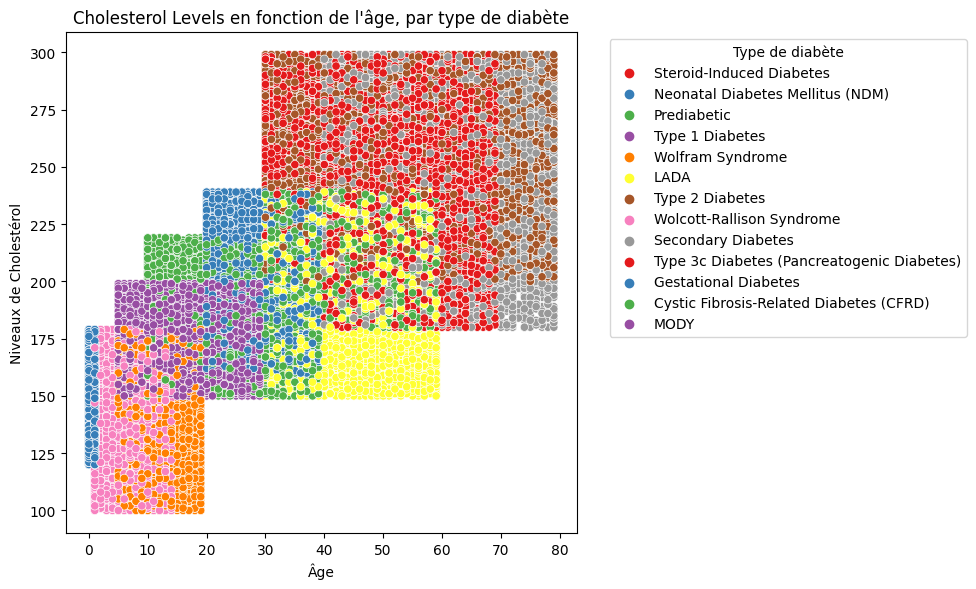

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol Levels', hue='Target', data=df, palette='Set1')

plt.title('Cholesterol Levels en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Niveaux de Cholestérol')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustement pour éviter les chevauchements
plt.show()


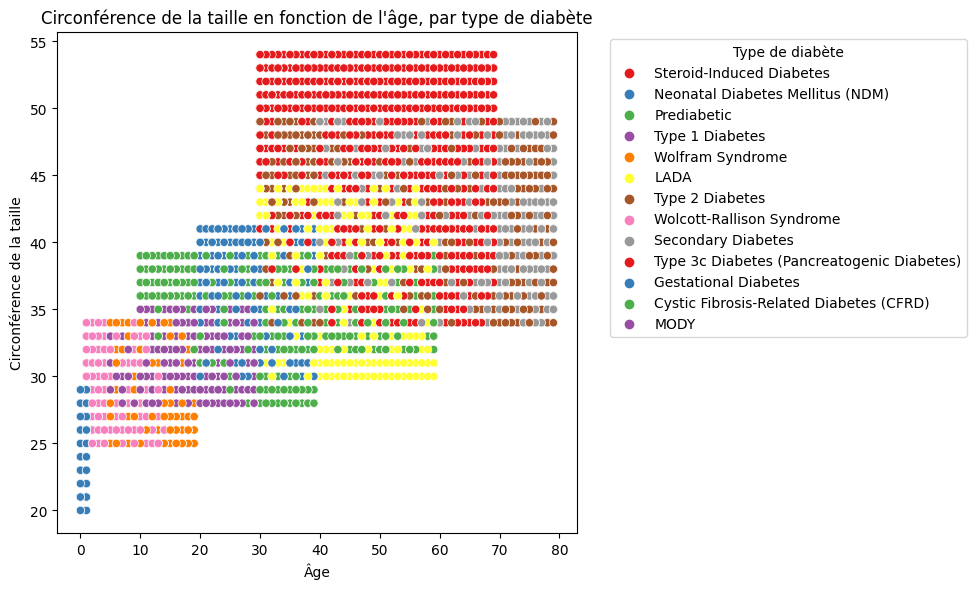

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la circonférence de la taille en fonction de l'âge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Waist Circumference', hue='Target', data=df, palette='Set1')

# Ajouter des titres et des labels
plt.title('Circonférence de la taille en fonction de l\'âge, par type de diabète')
plt.xlabel('Âge')
plt.ylabel('Circonférence de la taille')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Pour s'assurer que tout est bien ajusté
plt.show()


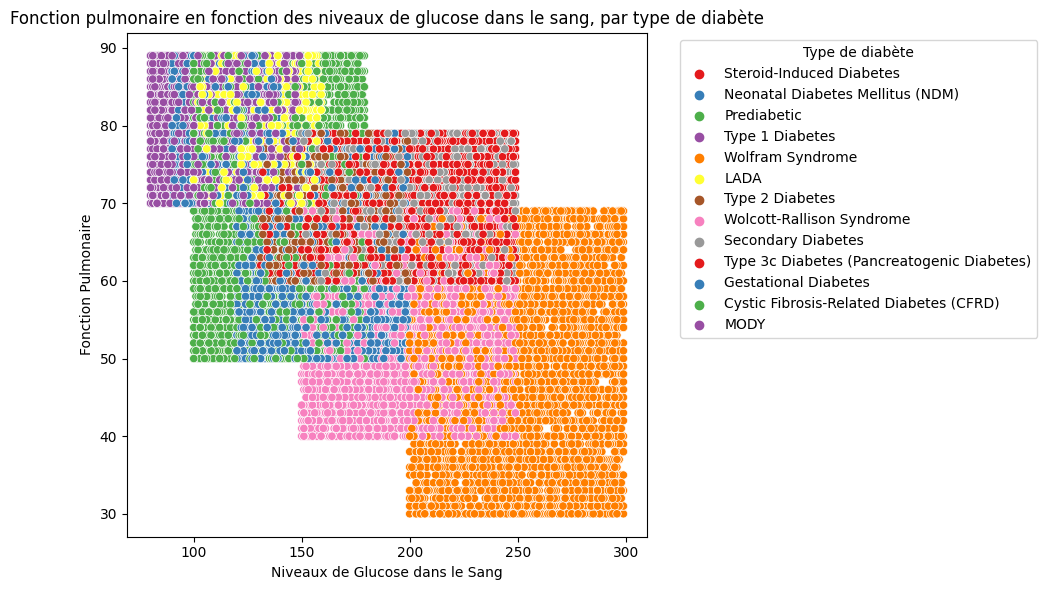

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la fonction pulmonaire en fonction des niveaux de glucose dans le sang
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Blood Glucose Levels', y='Pulmonary Function', hue='Target', data=df, palette='Set1')

# Ajouter des titres et des labels
plt.title('Fonction pulmonaire en fonction des niveaux de glucose dans le sang, par type de diabète')
plt.xlabel('Niveaux de Glucose dans le Sang')
plt.ylabel('Fonction Pulmonaire')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajuster pour éviter les chevauchements
plt.show()


Ce scatter plot montre la relation entre la fonction pulmonaire (axe des y) et les niveaux de glucose dans le sang (axe des x), avec une distinction par type de diabète (variable "Target"). Voici une analyse détaillée du graphique :

1. Relation générale entre les niveaux de glucose et la fonction pulmonaire :
La fonction pulmonaire varie entre 30 et 90, tandis que les niveaux de glucose dans le sang varient de 100 à 300.
Il n'y a pas de relation clairement linéaire ou corrélée entre la fonction pulmonaire et les niveaux de glucose. La répartition semble assez dispersée, bien qu'il existe des regroupements distincts par type de diabète.
2. Différences par types de diabète :
Type 2 Diabetes (orange) : On observe que les individus ayant le diabète de type 2 ont généralement des niveaux de glucose élevés (souvent supérieurs à 200), avec une fonction pulmonaire plus basse (en dessous de 70). Cela est cohérent avec ce que l'on sait du diabète de type 2, qui est souvent associé à une hyperglycémie chronique.
Type 1 Diabetes (violet) : Les patients ayant un diabète de type 1 ont des niveaux de glucose modérés (autour de 100-150) et des fonctions pulmonaires plus élevées (autour de 70-80).
Prediabetic (jaune) : Les patients prédiabétiques ont des niveaux de glucose qui se situent majoritairement entre 150 et 200, avec une fonction pulmonaire relativement stable (autour de 70-80).
Steroid-Induced Diabetes (rouge) et Type 3c Diabetes (gris clair) : Ces types de diabète montrent des niveaux de glucose plus dispersés (de 150 à 250) et des fonctions pulmonaires variant de manière plus large.
3. Segments distincts de population :
Fonction pulmonaire élevée (> 80) : Ce groupe semble regrouper principalement des individus avec des niveaux de glucose modérés (100-150) et une proportion plus élevée de personnes atteintes de Type 1 Diabetes et de diabète prédiabétique.
Fonction pulmonaire basse (< 50) : Ces individus ont des niveaux de glucose plus élevés (200-250) et sont souvent associés au diabète de type 2 et à certains cas de diabète gestationnel et secondaire.
4. Clustering par type de diabète :
Type 2 Diabetes : On observe un groupe bien défini pour les patients atteints de diabète de type 2 avec des niveaux de glucose très élevés (> 200) et une fonction pulmonaire relativement plus faible.
Prediabetic et Type 1 Diabetes : Ces groupes se chevauchent partiellement, mais on peut voir qu'ils tendent à avoir des niveaux de glucose plus modérés, avec une fonction pulmonaire plus forte en général.
5. Interprétation des données :
Le diabète de type 2 semble être associé à une fonction pulmonaire plus basse et à des niveaux de glucose plus élevés, tandis que le diabète de type 1 et les patients prédiabétiques tendent à avoir une meilleure fonction pulmonaire, avec des niveaux de glucose plus modérés.
Cette visualisation pourrait refléter l'impact des complications métaboliques du diabète sur la fonction pulmonaire, surtout chez les patients avec un diabète mal contrôlé ou une hyperglycémie chronique.
Conclusion :
Ce scatter plot montre des regroupements distincts des types de diabète en fonction des niveaux de glucose et de la fonction pulmonaire. Les individus atteints de diabète de type 2 tendent à avoir des niveaux de glucose plus élevés et une fonction pulmonaire plus basse, tandis que les patients avec un diabète de type 1 ou prédiabétiques montrent des niveaux de glucose plus modérés et une fonction pulmonaire plus élevée. Il est également intéressant de voir que d'autres types de diabète se répartissent dans des clusters intermédiaires.

Cela indique qu'il y a bien une relation complexe entre le contrôle du glucose et la santé pulmonaire, qui pourrait être explorée davantage dans le contexte de chaque type de diabète.

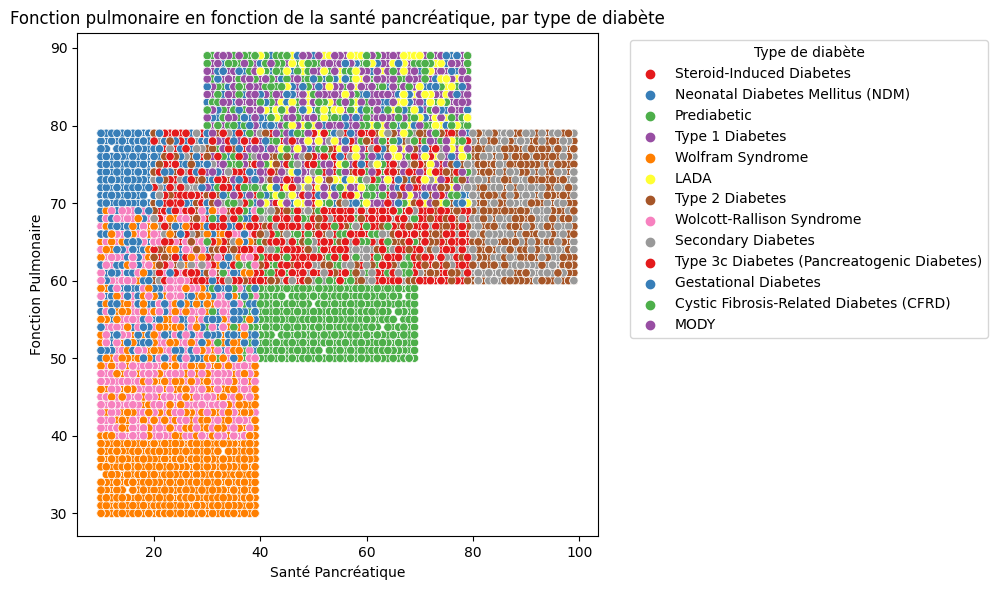

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un scatter plot pour visualiser la fonction pulmonaire en fonction de la santé pancréatique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pancreatic Health', y='Pulmonary Function', hue='Target', data=df, palette='Set1')

# Ajouter des titres et des labels
plt.title('Fonction pulmonaire en fonction de la santé pancréatique, par type de diabète')
plt.xlabel('Santé Pancréatique')
plt.ylabel('Fonction Pulmonaire')

# Déplacer la légende à côté du graphique
plt.legend(title='Type de diabète', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustement pour éviter les chevauchements
plt.show()


Ce scatter plot montre la relation entre la fonction pulmonaire (axe des y) et la santé pancréatique (axe des x), avec une distinction par type de diabète (variable "Target"). Voici une analyse détaillée de ce graphique :

1. Relation générale entre la fonction pulmonaire et la santé pancréatique :
La fonction pulmonaire varie entre 30 et 90, tandis que la santé pancréatique varie de 0 à 100.
La distribution est relativement dispersée, mais certaines catégories de Target se regroupent dans des zones spécifiques du graphique, indiquant des corrélations potentielles pour certains types de diabète.
2. Différences par type de diabète :
Type 2 Diabetes (orange) : Ce groupe montre une concentration dans des zones où la santé pancréatique est relativement basse (souvent inférieure à 40) et la fonction pulmonaire est également basse (souvent entre 30 et 50). Cela pourrait indiquer que ces individus souffrent à la fois de problèmes métaboliques liés au pancréas et de problèmes respiratoires, ce qui est cohérent avec les complications associées au diabète de type 2.
Type 1 Diabetes (vert clair) : Ces individus tendent à avoir une meilleure fonction pulmonaire (souvent entre 70 et 90) et une santé pancréatique modérée (entre 40 et 80). Ce résultat est cohérent avec le fait que le diabète de type 1 est une maladie auto-immune où la santé pancréatique est touchée, mais la fonction pulmonaire reste souvent relativement intacte, sauf dans les cas où d'autres complications apparaissent.
Prediabetic (jaune) : Ce groupe a une santé pancréatique modérée à élevée (50 à 80) et une fonction pulmonaire relativement élevée (70 à 80), ce qui est conforme au fait que ces individus sont en phase de pré-diabète sans complications pulmonaires majeures.
Steroid-Induced Diabetes (rouge) : Ces individus semblent avoir une santé pancréatique faible à modérée (20 à 60) avec une fonction pulmonaire variable (de 60 à 80). Le traitement par stéroïdes peut affecter la santé pancréatique, mais la fonction pulmonaire peut être affectée de manière différente selon les cas.
3. Segments distincts de population :
Fonction pulmonaire basse (< 50) et santé pancréatique faible (< 40) : Ce groupe semble principalement regrouper des patients atteints de diabète de type 2, ce qui pourrait indiquer un état plus avancé de la maladie avec des complications affectant à la fois le métabolisme et la respiration.
Fonction pulmonaire élevée (> 70) et santé pancréatique modérée à élevée (> 60) : Les patients avec une fonction pulmonaire plus forte et une santé pancréatique relativement bonne appartiennent principalement aux groupes prédiabétiques et type 1, qui sont en général dans des phases plus précoces ou bien gérées de la maladie.
4. Regroupements intéressants :
Diabète de type 2 et Gestational Diabetes (diabète gestationnel) : Ces groupes tendent à être regroupés avec une santé pancréatique faible et une fonction pulmonaire plus basse, montrant une tendance commune à des complications métaboliques plus sévères.
Les groupes Type 1 Diabetes et Prediabetic sont regroupés dans des zones de meilleure santé générale, à la fois pulmonaire et pancréatique, reflétant probablement une gestion plus précoce ou moins sévère de la maladie.
Conclusion :
Type 2 Diabetes est associé à une santé pancréatique faible et une fonction pulmonaire réduite, ce qui pourrait indiquer des complications plus sévères pour ce groupe.
Type 1 Diabetes et Prediabetic montrent une meilleure fonction pulmonaire et une santé pancréatique modérée à élevée, ce qui reflète une meilleure gestion ou un stade moins avancé de la maladie.
Les différentes catégories de diabète se regroupent dans des zones spécifiques du graphique, reflétant les différents impacts que chaque type de diabète peut avoir sur ces deux systèmes vitaux (pancréas et poumons).
En résumé, ce scatter plot met en évidence une relation complexe entre la fonction pulmonaire et la santé pancréatique, influencée par le type de diabète. Les personnes atteintes de diabète de type 2 semblent souffrir le plus en termes de déclin des deux fonctions, tandis que les patients prédiabétiques et ceux atteints de diabète de type 1 semblent se situer dans des zones plus favorables en termes de santé pulmonaire et pancréatique.

In [24]:
# Importation des bibliothèques nécessaires
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Chargement des données
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset00.csv')

# Affichage des 5 premières lignes du DataFrame
df.head()

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)

# Calcul des valeurs manquantes
nan_percentage = df.isna().sum() / df.count() * 100
nan_count = df.isna().sum()
nan_table = pd.concat([nan_count, nan_percentage], axis=1)
nan_table.columns = ['Count', 'Percentage']
nan_table

# Mapping pour la colonne Target (type de diabète)
target_mapping = {
  'Cystic Fibrosis-Related Diabetes (CFRD)': 0,
  'Gestational Diabetes': 1,
  'LADA': 2,
  'MODY': 3,
  'Neonatal Diabetes Mellitus (NDM)': 4,
  'Prediabetic': 5,
  'Secondary Diabetes': 6,
  'Steroid-Induced Diabetes': 7,
  'Type 1 Diabetes': 8,
  'Type 2 Diabetes': 9,
  'Type 3c Diabetes (Pancreatogenic Diabetes)': 10,
  'Wolcott-Rallison Syndrome': 11,
  'Wolfram Syndrome': 12
}

# Mapping pour les autres colonnes catégorielles
genetic_markers_mapping = {'Negative': 0, 'Positive': 1}
autoantibodies_mapping = {'Negative': 0, 'Positive': 1}
family_history_mapping = {'No': 0, 'Yes': 1}
environmental_factors_mapping = {'Absent': 0, 'Present': 1}
physical_activity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
dietary_habits_mapping = {'Unhealthy': 0, 'Healthy': 1}
ethnicity_mapping = {'Low Risk': 0, 'High Risk': 1}
socioeconomic_factors_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
smoking_status_mapping = {'Non-Smoker': 0, 'Smoker': 1}
alcohol_consumption_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
glucose_tolerance_test_mapping = {'Normal': 0, 'Abnormal': 1}
history_of_pcos_mapping = {'No': 0, 'Yes': 1}
previous_gestational_diabetes_mapping = {'No': 0, 'Yes': 1}
pregnancy_history_mapping = {'Normal': 0, 'Complications': 1}
cystic_fibrosis_diagnosis_mapping = {'No': 0, 'Yes': 1}
steroid_use_history_mapping = {'No': 0, 'Yes': 1}
genetic_testing_mapping = {'Negative': 0, 'Positive': 1}
liver_function_tests_mapping = {'Normal': 0, 'Abnormal': 1}
urine_test_mapping = {'Normal': 0, 'Protein Present': 1, 'Ketones Present': 2, 'Glucose Present': 3}
early_onset_symptoms_mapping = {'No': 0, 'Yes': 1}

# Application du mapping sur les colonnes du DataFrame
df['Target'] = df['Target'].map(target_mapping)
df['Genetic Markers'] = df['Genetic Markers'].map(genetic_markers_mapping)
df['Autoantibodies'] = df['Autoantibodies'].map(autoantibodies_mapping)
df['Family History'] = df['Family History'].map(family_history_mapping)
df['Environmental Factors'] = df['Environmental Factors'].map(environmental_factors_mapping)
df['Physical Activity'] = df['Physical Activity'].map(physical_activity_mapping)
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_habits_mapping)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df['Socioeconomic Factors'] = df['Socioeconomic Factors'].map(socioeconomic_factors_mapping)
df['Smoking Status'] = df['Smoking Status'].map(smoking_status_mapping)
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(alcohol_consumption_mapping)
df['Glucose Tolerance Test'] = df['Glucose Tolerance Test'].map(glucose_tolerance_test_mapping)
df['History of PCOS'] = df['History of PCOS'].map(history_of_pcos_mapping)
df['Previous Gestational Diabetes'] = df['Previous Gestational Diabetes'].map(previous_gestational_diabetes_mapping)
df['Pregnancy History'] = df['Pregnancy History'].map(pregnancy_history_mapping)
df['Cystic Fibrosis Diagnosis'] = df['Cystic Fibrosis Diagnosis'].map(cystic_fibrosis_diagnosis_mapping)
df['Steroid Use History'] = df['Steroid Use History'].map(steroid_use_history_mapping)
df['Genetic Testing'] = df['Genetic Testing'].map(genetic_testing_mapping)
df['Liver Function Tests'] = df['Liver Function Tests'].map(liver_function_tests_mapping)
df['Urine Test'] = df['Urine Test'].map(urine_test_mapping)
df['Early Onset Symptoms'] = df['Early Onset Symptoms'].map(early_onset_symptoms_mapping)

# Le DataFrame `df` est maintenant prêt avec des variables catégorielles encodées en valeurs numériques


In [25]:
# 1. Séparation des caractéristiques (features) et de la cible (target)
X = df.drop('Target', axis=1)  # Caractéristiques (features)
y = df['Target']  # Cible (Target)

# 2. Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Division en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisation des données (si nécessaire)
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler pour la normalisation
scaler = StandardScaler()

# Normalisation des données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entraînement d'un modèle de machine learning (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle Random Forest
# Limitation du nombre d'arbres et de la profondeur pour éviter les problèmes de mémoire
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# 5. Évaluation du modèle
from sklearn.metrics import accuracy_score, classification_report

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Rapport de classification détaillé
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# 6. Essayer un autre modèle : SVM
from sklearn.svm import SVC

# Initialisation et entraînement d'un modèle SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Prédictions avec le modèle SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Évaluer la précision du modèle SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Précision du modèle SVM : {accuracy_svm * 100:.2f}%')

# 7. Validation croisée pour le modèle Random Forest
from sklearn.model_selection import cross_val_score

# Validation croisée avec Random Forest
# Limitation du nombre de jobs parallèles pour éviter de surcharger la mémoire
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, n_jobs=2)
print(f'Précision moyenne avec validation croisée (Random Forest) : {cv_scores.mean() * 100:.2f}%')

# 8. Optimisation des hyperparamètres (facultatif, GridSearchCV par exemple)
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester pour Random Forest
# Limitation des paramètres pour éviter les problèmes de performance
param_grid = {
    'n_estimators': [50, 100],  # Limitation du nombre d'arbres pour réduire la charge mémoire
    'max_depth': [10, 20],      # Limitation de la profondeur des arbres
    'min_samples_split': [2, 5]
}

# Optimisation des hyperparamètres avec GridSearchCV
# Limitation du nombre de jobs parallèles pour éviter les surcharges
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=2, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
print(f'Meilleurs hyperparamètres : {grid_search.best_params_}')

# Réentraîner le modèle avec les meilleurs paramètres
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Évaluation du modèle optimisé
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Précision du modèle Random Forest optimisé : {accuracy_best_rf * 100:.2f}%')


Précision du modèle : 87.49%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1070
           1       0.88      0.83      0.85      1072
           2       0.92      0.92      0.92      1072
           3       0.91      0.84      0.87      1194
           4       1.00      1.00      1.00      1018
           5       0.89      1.00      0.94      1089
           6       0.79      0.74      0.76      1053
           7       0.82      0.72      0.77      1048
           8       0.84      1.00      0.91      1123
           9       0.96      0.66      0.78      1083
          10       0.68      1.00      0.81      1064
          11       1.00      0.84      0.91      1063
          12       0.86      1.00      0.92      1051

    accuracy                           0.87     14000
   macro avg       0.89      0.88      0.87     14000
weighted avg       0.89      0.87      0.87     14000

Précision du modèle SV